In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

In [5]:
#load data
df = pd.read_csv('../data/telco_comm_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [17]:
print(f"Churn Rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.2f}%")

Churn Rate: 26.54%


In [19]:
#Numerical Features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [21]:
df[numerical_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Visualise Target Variables

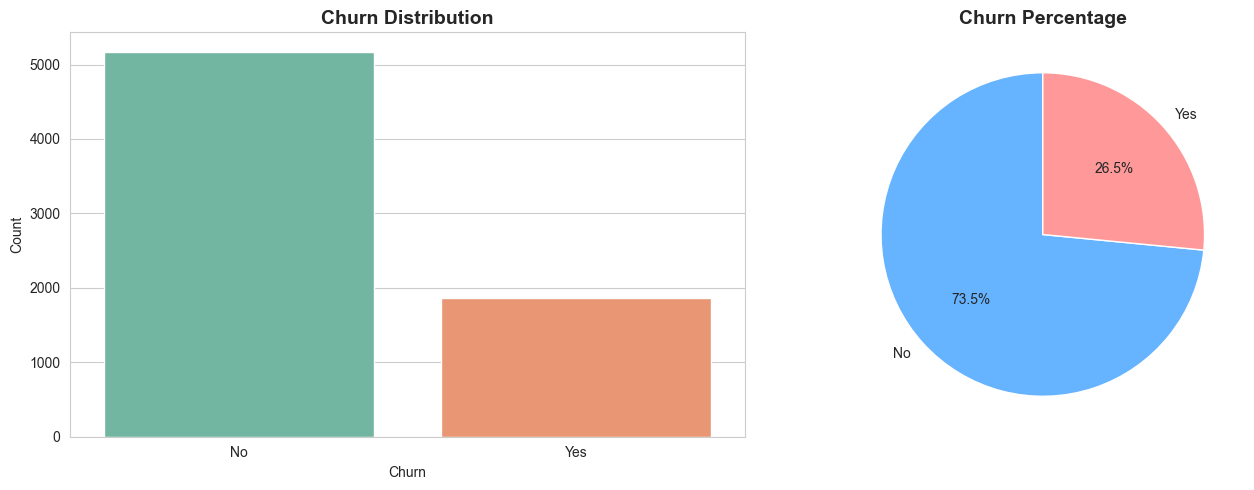

In [32]:
fig, ax = plt.subplots(1,2,figsize=(14,5))

sns.countplot(data=df, 
              x = 'Churn', 
              ax = ax[0], 
              palette='Set2')

ax[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Count')

churn_count= df['Churn'].value_counts()
ax[1].pie(churn_count, 
          labels = churn_count.index, 
          autopct = '%1.1f%%',
          startangle=90, 
          colors = ['#66b3ff', '#ff9999'])
ax[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()

#save the report
plt.savefig('../reports/churn_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

### Numerical Features v/s Churn

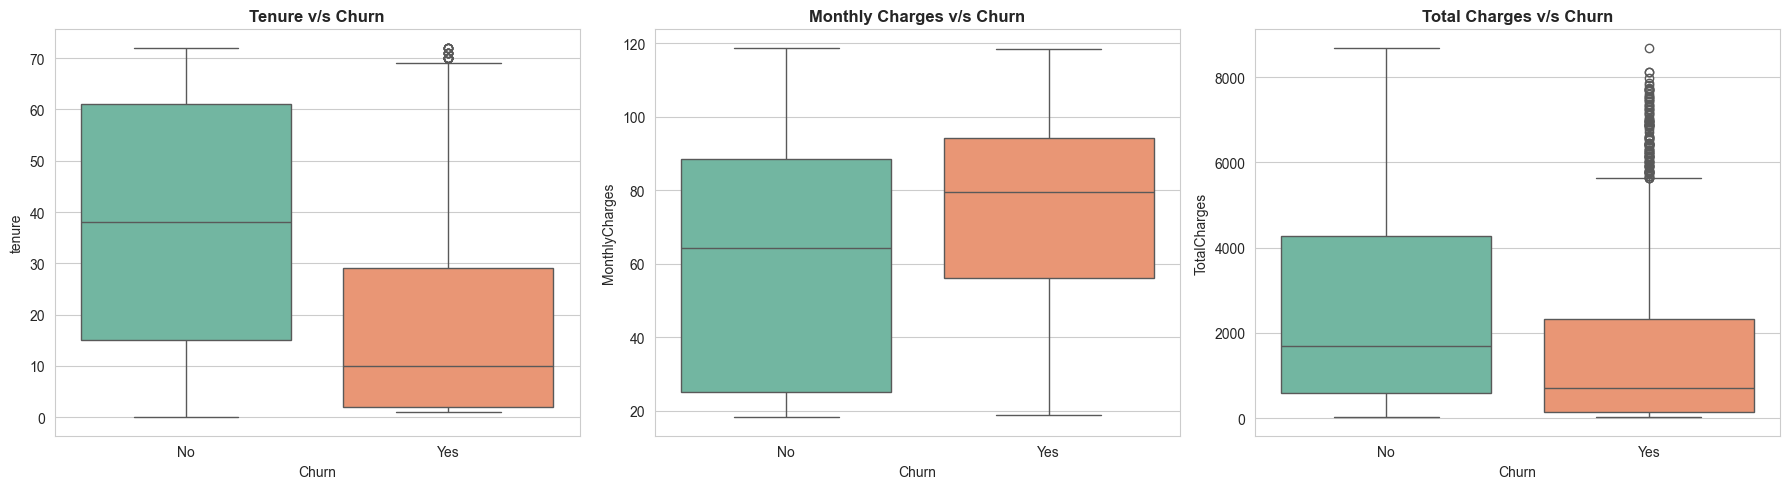

In [51]:
fig,ax = plt.subplots(1,3, figsize=(18,5))

sns.boxplot(data = df,
            x = 'Churn',
            y='tenure', 
            ax=ax[0], 
            palette='Set2')
ax[0].set_title('Tenure v/s Churn', fontsize=12, fontweight ='bold')
sns.boxplot(data=df,
            x='Churn',
            y='MonthlyCharges',
            ax=ax[1],
            palette='Set2')
ax[1].set_title('Monthly Charges v/s Churn', fontsize=12, fontweight ='bold')


#totalcharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
sns.boxplot(data=df,
            x = 'Churn',
            y='TotalCharges',
            ax=ax[2],
            palette='Set2')
ax[2].set_title('Total Charges v/s Churn', fontsize=12, fontweight ='bold')


plt.tight_layout()
plt.savefig('../reports/numerical_analysis.png', dpi=300, bbox_inches='tight')

plt.show()